<a href="https://colab.research.google.com/github/VMI1997/UCB-Module-11/blob/main/mod11_pa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
#  Determine the Business Objectives
#  The objective of this exercise is to create a model that will be valuable to an automobile dealership.  In order to deliver on that value statement, we need to ensure that the dealership can:
#  1).  Understand the features that are most desireable to customers - we will use price as a proxy for this value assessment
#  2).  Understand the value to place on an automobile - this is important when acquiring automobiles for inventory (i.e. purchase price setting) and for when selling vehicles to customers (i.e. selling price setting)

In [ ]:
#  Assess the Situation
#  We have been provided with a dataset containing details of vehicle sales - the dataset contains approx. 426K records with multiple columns of detail
#  We will assume that this data is valid as stands - with the expectation that any inherent data quality issues or completeness issues will be addressed as part of our pre-processing
#  The constraints are the dataset we have been provided and the timebounds of the project (1 week)
#  The primary risks will be related to the completeness of the data - which we will mitigate through corrective data actions
#  We expect the benefits to be driven at the dealership through an effective model that allows the dealership to optimize profits through pricing

In [ ]:
#  Determine the Data-Mining Goals
#  To develop and test multiple models for determining the ideal features of an automobile most desireable to customers
#  Our success criteria will be to analyze several different models and recommend the model we believe is best

In [ ]:
#  Product the Project Plan
#  Complete Business and Data Understanding (Wed-Thurs)
#  Complete Data Preparation (Fri-Sat)
#  Complete modeling (Sat-Sun)
#  Complete Evaluation of the Models (Sun-Mon)
#  Finalize Report and Deliverables (Mon-Tues)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
#  Collect the Initial Data
#  The initial data was provided as a part of this exercise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25815 entries, 0 to 25814
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            25815 non-null  int64  
 1   region        25815 non-null  object 
 2   price         25815 non-null  int64  
 3   year          25651 non-null  float64
 4   manufacturer  24676 non-null  object 
 5   model         25433 non-null  object 
 6   condition     15139 non-null  object 
 7   cylinders     15371 non-null  object 
 8   fuel          25631 non-null  object 
 9   odometer      25539 non-null  float64
 10  title_status  25406 non-null  object 
 11  transmission  25710 non-null  object 
 12  VIN           16104 non-null  object 
 13  drive         18201 non-null  object 
 14  size          6757 non-null   object 
 15  type          20137 non-null  object 
 16  paint_color   18818 non-null  object 
 17  state         25814 non-null  object 
dtypes: float64(2), int64(2), o

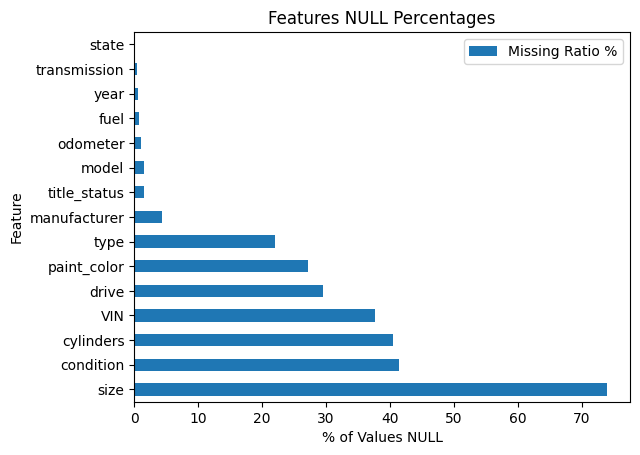

In [1]:
#  Describe the Data
#  We will first load the data from the provided csv - then we will look at the basic info associated with this data
import pandas as pd
import seaborn as sns
vehdata = pd.read_csv('vehicles.csv')
vehdata.info()
#  From this initial info, we see the following:
#  There are 18 columns of data and 426,880 records
#  There are varying levels of null data within (ranging from field with no null data to 306K null records)
#  Many of the fields are object type and will likely require conversion to numeric values or one hot encoding

#  Visual view of the NULL values within key features that contain null values
import matplotlib.pyplot as plt
if vehdata.isnull().sum().sum() != 0:
    null_df = (vehdata.isnull().sum() / len(vehdata)) * 100
    null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :null_df})
    missing_data.plot(kind = "barh")
    plt.xlabel("% of Values NULL")
    plt.ylabel("Feature")
    plt.title("Features NULL Percentages")
    plt.show()
else:
    print('No NAs found')






In [ ]:
#  Explore the Data
#  Based on an initial assessment, the following are observations and planned actions
#  1).  year:  we will look at turning this field into the "age" of the vehicle by subtracting the year value from current year
#  2).  cylinders:  this data is text in nature and may have multiple values for the same value - we will encode this to actual number of cylinders since there is logical order of values
#  3).  fuel:  given there are only a few values and there is not a logical ordering to them, we will use one hot encoding on this feature
#  4).  title_status:  given there are only a few values and there is not a logical ordering to them, we will use one hot encoding on this feature
#  5).  transmission: given there are only a few values and there is not a logical ordering to them, we will use one hot encoding on this feature
#  6).  size:  given there are 4 values and there is a logical ordering, we will convert to 1-4
#  7).  type:  given there are only a few values and there is not a logical ordering to them, we will use one hot encoding on this feature
#  8).  paint_color:  given there are only a few values and there is not a logical ordering to them, we will use one hot encoding on this feature
#  For these features, where there are NULL values, we will likely drop these values from our analysis as they are challenging to determine or try to complete

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

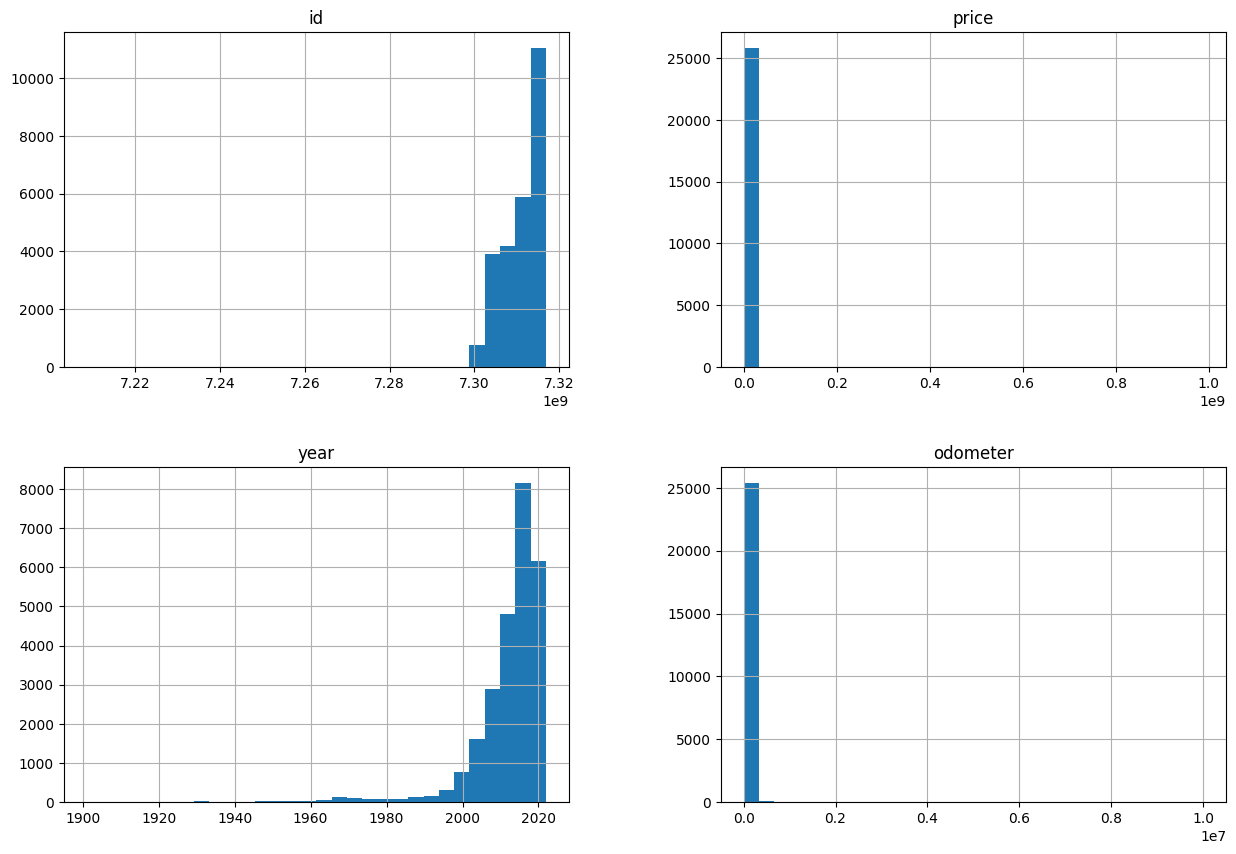

In [35]:
#  Initial visualization of values prior to data preparation
vehdata.hist(bins=30, figsize=(15, 10))

In [34]:
#  Verify the Data Quality
#  As mentioned previously, it is clear that we have some NULL values to contend with in this data
#  The following is a field by field analysis of data quality:
#  id:  the unique id field for each record; no NULL values; this field will not be useful in our modeling as it does not have business meaning
#  region:  this is the region where the vehicle was sold; no NULL values;  this may be useful if there is a geographic dimension to pricing
#  price:  this is our target prediction value
#  year:  this is the year the purchased vehicle was made; there are 1,205 NULL values or 0.2%; we will convert year to "age" of the vehicle
#  manufacturer: the company that produced the vehicle; there are 42 distinct values which look generally clean;  there are 17,646 NULL values or 4.1%
#  model:  the model within the manufacturer line; there are almost 30K rows and this data looks pretty messy due to what appears to be free form data; there are 5,277 NULL values or 1.2%
#  condition:  the condition of the vehicle; there are 6 values that seem to support a logical ordering; this feature would seem to be important in pricing; there are 174K NULL values or 41%
#  cylinders:  the number of cylinders in the engine; there are 8 values that are logical to order and will be assigned numeric values; there are 178K NULL values or 42%
#  fuel:  the type of fuel used in the car; there are 5 values that are not logical to order; there are 3,013 NULL values or 0.7%
#  odometer:  the number of miles on the vehicle; there are nearly 105K values; there are 4,400 NULL values or 1%
#  title_status:  the status of the title of the vehicle; there are 6 values but the majority are one value - this is likely not useful; there are 8K NULL values or 2%
#  transmission:  the type of transmission in teh vehicle;  there are 3 values but the majority are one value - this is likely not useful; there are 2,556 NULL values or 0.6%
#  VIN:  this data is not meaningful to the pricing of a vehicle as it is not a feature - we will drop this feature
#  drive:  there are 3 values of this feature and it seems like a meaningful feature; there are 131K NULL values or 31%
#  size:  there are 4 sizes and these seem to have a logical ordering and will be converted to numeric; there are 306K NULL values or 72% so using this data may be challenging
#  type:  this is the type of vehicle it is; there are 13 values that do not have a logical ordering; there are 93K NULL values or 22%
#  paint_color:  the exterior color of the vehicle; there are 12 values that do not have a logical ordering; there are 130K NULL values or 31%
#  state:  the state the vehicle was sold; there are NO NULL values; there are 51 unique values (all states)



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [13]:
#  Drop rows of data where key columns have NULL data within
key_columns = ['price', 'paint_color', 'cylinders', 'condition', 'type', 'manufacturer', 'title_status','year','odometer','size','model']
vehdata_null_clean = vehdata.dropna(subset=key_columns)
print('This is the view of the dataframe after removing NULL rows for key columns')
vehdata_null_clean.info()
#  We will start by adding a column to capture the age of the vehicle
vehdata_null_clean['age'] = 2024 - vehdata_null_clean['year']
#  Next we will encode the cylinders, condition and size into a pure numeric values
vehdata_null_clean['cylinders'] = vehdata_null_clean['cylinders'].replace({'3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12, 'other':'0'})
vehdata_null_clean['cylinders'] = pd.to_numeric(vehdata_null_clean['cylinders'])
vehdata_null_clean['size'] = vehdata_null_clean['size'].replace({'full-size':4, 'mid-size': 3, 'compact':2, 'sub-compact':1})
vehdata_null_clean['size'] = pd.to_numeric(vehdata_null_clean['size'])
vehdata_null_clean['condition'] = vehdata_null_clean['condition'].replace({'new':6, 'like new': 5, 'excellent': 4, 'good': 3, 'fair': 2, 'salvage': 1})
vehdata_null_clean['condition'] = pd.to_numeric(vehdata_null_clean['condition'])
#  Next we will convert fuel type, title status, transmission, type of vehicle, drive and paintc color via one hot encoding
vehdata_encoded = pd.get_dummies(vehdata_null_clean, columns=['fuel','title_status','transmission','type','paint_color', 'drive'])
vehdata_encoded = vehdata_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)
#  Next we will drop VIN column as it is not useful in our modeling
vehdata_encoded = vehdata_encoded.drop('VIN', axis=1)
#  Next we will drop year now that we have the age column
vehdata_encoded = vehdata_encoded.drop('year', axis=1)
vehdata_encoded.info()




This is the view of the dataframe after removing NULL rows for key columns
<class 'pandas.core.frame.DataFrame'>
Index: 4636 entries, 31 to 25813
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4636 non-null   int64  
 1   region        4636 non-null   object 
 2   price         4636 non-null   int64  
 3   year          4636 non-null   float64
 4   manufacturer  4636 non-null   object 
 5   model         4636 non-null   object 
 6   condition     4636 non-null   object 
 7   cylinders     4636 non-null   object 
 8   fuel          4636 non-null   object 
 9   odometer      4636 non-null   float64
 10  title_status  4636 non-null   object 
 11  transmission  4636 non-null   object 
 12  VIN           1982 non-null   object 
 13  drive         4495 non-null   object 
 14  size          4636 non-null   object 
 15  type          4636 non-null   object 
 16  paint_color   4636 non-null   object 
 17 

<ipython-input-13-ac34b223db9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehdata_null_clean['age'] = 2024 - vehdata_null_clean['year']
<ipython-input-13-ac34b223db9c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehdata_null_clean['cylinders'] = vehdata_null_clean['cylinders'].replace({'3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12, 'other':'0'})
<ipython-input-13-ac34b223db9c>:10: SettingWithCopyWarning: 
A value 

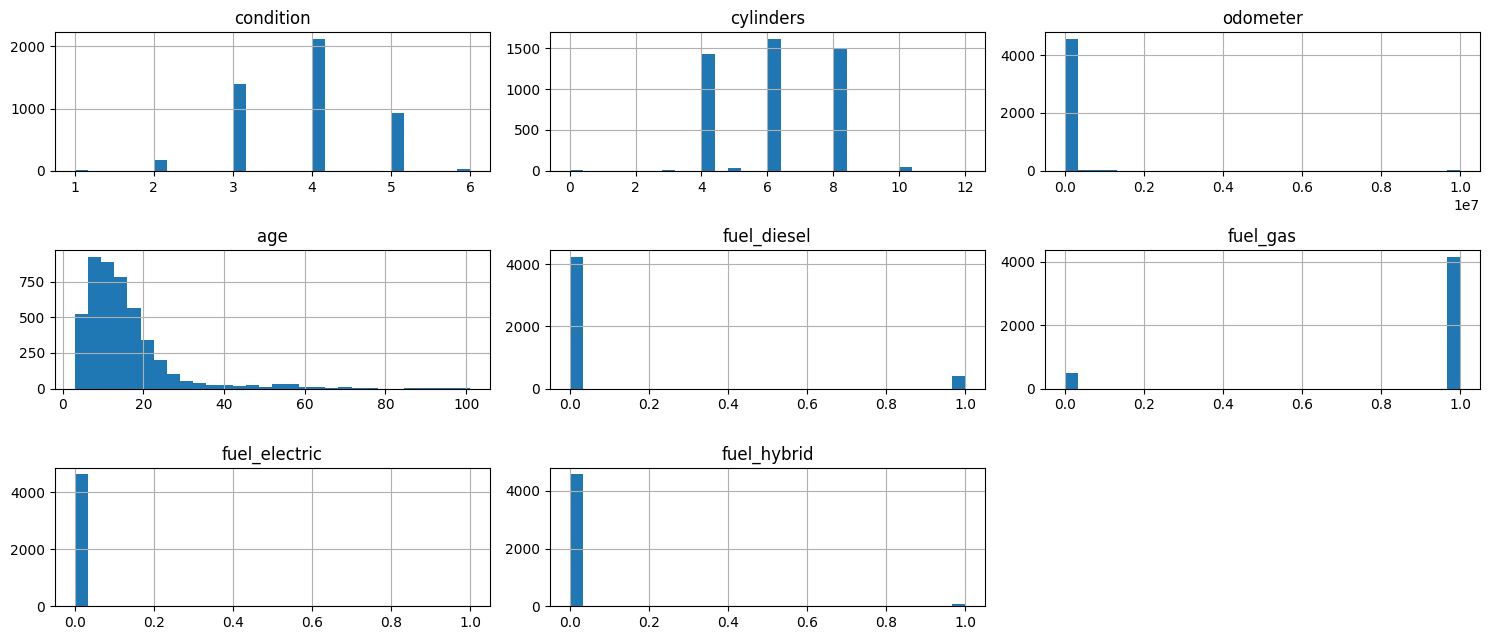

In [40]:
plot_df = vehdata_encoded[['condition','cylinders','odometer','age','fuel_diesel','fuel_gas','fuel_electric','fuel_hybrid']]
plot_df.hist(bins=30, figsize=(15, 10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout(rect=[0,0.3, 1, 0.95])
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [33]:
#  Multiple Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
#vehdata_encoded.dropna(axis='index', inplace=True)
#vehdata_encoded.info()
X = vehdata_encoded[['odometer','age','condition']]
y = vehdata_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
lin_reg.coef_

Mean Squared Error: 173063398.97029093
Mean Absolute Error: 9512.312077129525


array([-2.97449471e-03, -2.33636710e+02,  4.22250006e+03])

In [32]:
# Feature Selection Process using SKLEARN
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

vehdata_fs = vehdata_encoded.drop(columns=['id'])
#vehdata_fs.info()

X = vehdata_fs.drop('price', axis=1).select_dtypes(include=np.number)

y = vehdata_fs['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k='all')
fit = select_k_best.fit(X_train, y_train)
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(X_train.columns)

#Get the top 10 features most relevant to pricing/value
featureScores = pd.concat([cols,scores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))




                      Specs         Score
2                  odometer  8.430965e+08
4                       age  1.039024e+04
43       paint_color_yellow  1.713841e+03
18       transmission_other  1.571362e+03
5               fuel_diesel  1.341032e+03
30                 type_van  1.205486e+03
29               type_truck  1.136166e+03
13  title_status_parts only  1.118627e+03
11        title_status_lien  1.011881e+03
35       paint_color_custom  1.003228e+03


In [31]:
#After running feature selection - examine change to feature used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
#vehdata_encoded.dropna(axis='index', inplace=True)
#vehdata_encoded.info()
X = vehdata_encoded[['odometer','age','paint_color_yellow','transmission_other','fuel_diesel']]
y = vehdata_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
lin_reg.coef_

Mean Squared Error: 173807889.16817784
Mean Absolute Error: 9511.298003035008


array([-3.20474641e-03, -3.25325967e+02,  3.75282122e+03, -2.95161574e+03,
        1.41817661e+04])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
#  Evaluate Results
#  The models have met the high level objective of providing insight and understanding into the key drivers in the value of the vehicles.
#  A linear regression model using the top features identified in feature selection produced solid results validated through cross validation

In [ ]:
#  Review Process
#  Given more time, there are some additional areas of opportunity I would pursue
#  1).  Additional data cleansing - looking at outliers
#  2).  Additional work to leverage some additional fields such as state and region to identify locational drivers

In [ ]:
#  Determine next steps
#  Based on the overall objectives and work performed, recommendation is to proceed with the model built AND to leverage the key features identified through feature selection
#  These features can be leveraged when purchasing and selling vehicles - to determine desireability and to set pricing

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
#  Plan Deployment
#  Make the model usable and accessible with clear inputs for customer
#  Plan an appropriate refresh cycle to ensure the model is refreshed over time with new data as conditions change
#  Determine conditions that would trigger the need to refresh the model